In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def hog_descriptor(img):
    hog = cv2.HOGDescriptor()
    h = hog.compute(img)
    return h

In [3]:
def videoReader(video,play=False):
    cap = cv2.VideoCapture(video)
    if (cap.isOpened() == False): 
        print("Error opening video stream or file")
    if play:
        while(cap.isOpened()):
            ret, frame = cap.read()
            if ret == True:
                cv2.imshow('Frame',frame)
                if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
            else:
                break
        cap.release()
        cv2.destroyAllWindows()
    return cap

In [4]:
def match_video(image_descriptor, path_video, width, height):
    samples_per_video = 5
    
    video = videoReader(path_video)
    numberOfFrames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    video_width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    video_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print("Video info", path_video,"Frames",numberOfFrames,"Dimensions",video_width,video_height,"Distance ",end='')
    
    min_distance = 100000
    
    for i in range(0,numberOfFrames,numberOfFrames//samples_per_video):
        video.set(cv2.CAP_PROP_POS_FRAMES, i)
        res, frame = video.read()
#         print(frame.shape)
        resized_frame = cv2.resize(frame,(width,height),cv2.INTER_CUBIC)
#         print(resized_frame.shape)
        frame_descriptor = hog_descriptor(resized_frame)
        
        distance = np.linalg.norm(frame_descriptor - image_descriptor)
#         print(distance)
        if min_distance > distance:
            min_distance = distance
#             min_index = i
    print(min_distance)
    return min_distance

# Read image

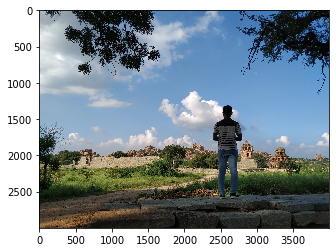

In [5]:
img = cv2.imread('./input_images/yash.jpg')
plt.imshow(img[:,:,::-1])
img = img[:,:,::-1]

In [6]:
# cap = videoReader(video_path)
# numberOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# print(numberOfFrames,width,height)

In [7]:
from os import listdir
from os.path import isfile, join
videos_dir = '../videos_h264/'
videos_paths = [videos_dir + f for f in listdir(videos_dir) if isfile(join(videos_dir, f))]
print(len(videos_paths))

463


In [8]:
# plt.figure(figsize=(16,16))
# plt.subplot(1,2,1)
# plt.imshow(im)
# plt.subplot(1,2,2)
# plt.imshow(h)

In [9]:
print(time.time())

resized_image = cv2.resize(img,(256,128),cv2.INTER_CUBIC)
image_descriptor = hog_descriptor(resized_image)

min_index = None
min_distance = 100000
count = 0
total = len(videos_paths)
for video_path in videos_paths:
    if video_path == '../videos_h264/Thumbs.db':
        continue
    distance = match_video(image_descriptor, video_path,256,128)
    if distance < min_distance:
        min_distance = distance
        min_index = video_path
    count += 1
    if count % 25:
        print(count,'/',total)
print(min_distance)
print(min_index)
print(time.time())

1583840319.1884284
Video info ../videos_h264/04_16_2012_16_36_28.mp4 Frames 4062 Dimensions 1280 720 Distance 31.115211
1 / 463
Video info ../videos_h264/TimeLapseofSunsetHDRFX_7.mp4 Frames 620 Dimensions 1920 1080 Distance 33.537083
2 / 463
Video info ../videos_h264/city.mp4 Frames 2793 Dimensions 1280 720 Distance 32.135754
3 / 463
Video info ../videos_h264/Fort_Lauderdale_Time_lapse.mp4 Frames 3249 Dimensions 480 360 Distance 31.317154
4 / 463
Video info ../videos_h264/4006_2.mp4 Frames 450 Dimensions 1920 1080 Distance 32.425278
5 / 463
Video info ../videos_h264/24__Hr_Time_Lapse.mp4 Frames 9460 Dimensions 1920 1080 Distance 33.176743
6 / 463
Video info ../videos_h264/Timelapse___Puerto_de_Malaga.mp4 Frames 1243 Dimensions 1280 720 Distance 31.888996
7 / 463
Video info ../videos_h264/59399399.mp4 Frames 1375 Dimensions 1280 856 Distance 28.700428
8 / 463
Video info ../videos_h264/24_Hour_Boston_Timelapse__Longwood_Medical_Area_.mp4 Frames 1799 Dimensions 1920 1080 Distance 32.26762

Video info ../videos_h264/toronto_sunset_time_lapse_1920x1080.mp4 Frames 592 Dimensions 1920 1080 Distance 33.547672
72 / 463
Video info ../videos_h264/Sunset_Time_Lapse___In_A_Brooklyn_Minute__Week_115___HD_.mp4 Frames 1421 Dimensions 1280 720 Distance 28.860737
73 / 463
Video info ../videos_h264/Sunrise_Street_Lights__Time_Lapse_Video_Experiment_.mp4 Frames 299 Dimensions 1280 720 Distance 30.675991
74 / 463
Video info ../videos_h264/54688772.mp4 Frames 544 Dimensions 1920 1080 Distance 31.011694
Video info ../videos_h264/247.mp4 Frames 175 Dimensions 1024 576 Distance 34.730892
76 / 463
Video info ../videos_h264/31087573.mp4 Frames 2318 Dimensions 1280 720 Distance 31.294008
77 / 463
Video info ../videos_h264/Vie_de_la_Tour_Eiffel_04___05_2009_HD.mp4 Frames 8645 Dimensions 1280 720 Distance 38.46569
78 / 463
Video info ../videos_h264/11425195.mp4 Frames 6224 Dimensions 1280 720 Distance 35.444023
79 / 463
Video info ../videos_h264/First_time_lapse__1_.mp4 Frames 151 Dimensions 1080 

Video info ../videos_h264/NYC_Time_Lapse___215_East_96th_.mp4 Frames 2028 Dimensions 1280 720 Distance 33.676437
142 / 463
Video info ../videos_h264/OpenfootageNETCitysalzburg1080p.mp4 Frames 242 Dimensions 1920 1080 Distance 29.06401
143 / 463
Video info ../videos_h264/830.mp4 Frames 450 Dimensions 1024 576 Distance 32.71852
144 / 463
Video info ../videos_h264/day_to_night.mp4 Frames 664 Dimensions 1280 720 Distance 39.871735
145 / 463
Video info ../videos_h264/791.mp4 Frames 425 Dimensions 1024 576 Distance 33.688385
146 / 463
Video info ../videos_h264/24_Hour_Time_Lapse_of_Downtown_Vancouver_during_the_2010_Winter_Olympics.mp4 Frames 2616 Dimensions 480 320 Distance 31.666996
147 / 463
Video info ../videos_h264/Time_Lapse__Desde_Muelleuno__aga__2012_.mp4 Frames 3130 Dimensions 1920 1080 Distance 30.560284
148 / 463
Video info ../videos_h264/40143.mp4 Frames 291 Dimensions 1920 1080 Distance 29.611977
149 / 463
Video info ../videos_h264/9_11_Lower_Manhattan_Sunrise_Time_Lapse.mp4 Fra

Video info ../videos_h264/4008_10.mp4 Frames 239 Dimensions 1920 1080 Distance 33.585155
212 / 463
Video info ../videos_h264/poulailler.mp4 Frames 1203 Dimensions 1920 1080 Distance 33.533398
213 / 463
Video info ../videos_h264/time_lapse_of_port_of_seattle_from_pacific_building_1280x720.mp4 Frames 4062 Dimensions 1280 720 Distance 31.115211
214 / 463
Video info ../videos_h264/20120809_time_laps_jarreauds_circumpolaire.mp4 Frames 2022 Dimensions 1080 720 Distance 32.047947
215 / 463
Video info ../videos_h264/Time_Lapse_Corona_Subway_Yard.mp4 Frames 3287 Dimensions 1920 1080 Distance 34.022
216 / 463
Video info ../videos_h264/54689090.mp4 Frames 1439 Dimensions 1920 1080 Distance 31.309467
217 / 463
Video info ../videos_h264/Cuzco__Peru__Timelapse__03_2012__1080p_HD.mp4 Frames 4143 Dimensions 1920 1080 Distance 29.764378
218 / 463
Video info ../videos_h264/Cloud_Gate_AKA_The_Bean_at_Sunset.mp4 Frames 5918 Dimensions 480 360 Distance 33.985363
219 / 463
Video info ../videos_h264/Time_Lap

Video info ../videos_h264/NYC_TL_SHOT_1.mp4 Frames 551 Dimensions 1920 1080 Distance 31.105207
280 / 463
Video info ../videos_h264/24_hours_time_lapse.mp4 Frames 907 Dimensions 1272 720 Distance 30.968477
281 / 463
Video info ../videos_h264/Time_lapse___24_hours_from_the_apartment__2_.mp4 Frames 634 Dimensions 1620 1080 Distance 31.468662
282 / 463
Video info ../videos_h264/First_time_lapse.mp4 Frames 151 Dimensions 1080 720 Distance 35.703484
283 / 463
Video info ../videos_h264/91366222.mp4 Frames 2981 Dimensions 1920 1080 Distance 31.377974
284 / 463
Video info ../videos_h264/OpenfootageNETsunsetgarda720p.mp4 Frames 320 Dimensions 1280 720 Distance 31.693281
285 / 463
Video info ../videos_h264/40328.mp4 Frames 447 Dimensions 1920 1080 Distance 31.098051
286 / 463
Video info ../videos_h264/Snow_Day_February_2009___24_hour_Time_Lapse.mp4 Frames 3487 Dimensions 1280 720 Distance 35.61622
287 / 463
Video info ../videos_h264/24_hours_Time_lapse_of_Norco_Hills_weather_Mar_25_2012.mp4 Frame

Video info ../videos_h264/12_Hour_Time_Lapse_On_Madison_Street_Looking_West.mp4 Frames 604 Dimensions 720 1080 Distance 34.213455
348 / 463
Video info ../videos_h264/24h_Time_Lapse_in_HD_over_Almada.mp4 Frames 2698 Dimensions 1280 720 Distance 31.128742
349 / 463
Video info ../videos_h264/Time_Lapse_of_Cork_Harbour___24_hours_in_2_minutes_.mp4 Frames 3562 Dimensions 1920 1080 Distance 30.847109
Video info ../videos_h264/Dubai_24_hour_timelapse.mp4 Frames 3597 Dimensions 1920 1080 Distance 30.852205
351 / 463
Video info ../videos_h264/24_Hours_in_NYC_Time_Lapse.mp4 Frames 1749 Dimensions 540 360 Distance 32.615505
352 / 463
Video info ../videos_h264/Time_Lapse_Sunrise.mp4 Frames 718 Dimensions 1280 720 Distance 32.38156
353 / 463
Video info ../videos_h264/Germany_SHOT_1.mp4 Frames 589 Dimensions 1920 1080 Distance 30.87159
354 / 463
Video info ../videos_h264/228.mp4 Frames 300 Dimensions 1024 576 Distance 35.00198
355 / 463
Video info ../videos_h264/518.mp4 Frames 707 Dimensions 1024 57

Video info ../videos_h264/012411_11_TL.mp4 Frames 342 Dimensions 1920 1080 Distance 35.394028
418 / 463
Video info ../videos_h264/94554424.mp4 Frames 787 Dimensions 1280 720 Distance 32.86837
419 / 463
Video info ../videos_h264/NIGHT_IN_SEATTLE_IN_HD_____ALONG_THE_WATERFRONT.mp4 Frames 412 Dimensions 1280 720 Distance 31.237892
420 / 463
Video info ../videos_h264/timelapse_avi.mp4 Frames 374 Dimensions 1620 1080 Distance 30.549675
421 / 463
Video info ../videos_h264/Kuching_dusk.mp4 Frames 313 Dimensions 1620 1080 Distance 28.71022
422 / 463
Video info ../videos_h264/window.mp4 Frames 374 Dimensions 568 320 Distance 36.64734
423 / 463
Video info ../videos_h264/Hong_Kong_timelapse.mp4 Frames 1426 Dimensions 1920 1080 Distance 29.721825
424 / 463
Video info ../videos_h264/osaka_timelapse_1_1920x1282.mp4 Frames 282 Dimensions 1920 1282 Distance 30.752836
Video info ../videos_h264/SEATTLE___MOONRISE_OVER_THE_CITY_IN_HD_TIMELAPSE.mp4 Frames 648 Dimensions 1280 720 Distance 32.759953
426 / 4

### Time taken in mintues - 12.85

#  Method 2

In [10]:
import pickle
with open('timelapseHOG.pickle', 'rb') as handle:
    timeLapseVideoHOGs = pickle.load(handle)

In [11]:
def checkVideo(image_descriptor,video_hog,samples_per_video=5):
    min_distance = 100000

    for i in range(samples_per_video):
        distance = np.linalg.norm(video_hog[i] - image_descriptor)
        if min_distance > distance:
            min_distance = distance

    return min_distance

In [12]:
def findBestVideo(image):
    resized_image = cv2.resize(image,(256,128),cv2.INTER_CUBIC)
    image_descriptor = hog_descriptor(resized_image)
    #print(image_descriptor.shape)
    
    min_index = None
    min_distance = 100000
    distances_array = []
    
    count = 0
    total = len(videos_paths)
    for video_path,video_hog in timeLapseVideoHOGs.items():
        distance = checkVideo(image_descriptor,video_hog)
        distances_array.append((distance,video_path))
        if distance < min_distance:
            min_distance = distance
            min_index = video_path
        count += 1
        print(count,'/',total,'\t',distance,'\t',video_path,)
    
    print(min_distance)
    print(min_index)
    distances_array.sort()
    
    return distances_array[:6]

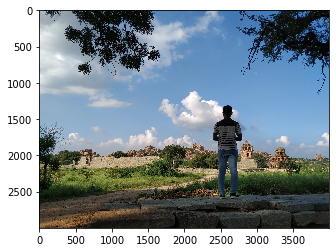

In [13]:
img = cv2.imread('./input_images/yash.jpg')
plt.imshow(img[:,:,::-1])
img = img[:,:,::-1]

In [14]:
# print(time.time())
bestVideos = findBestVideo(img)
# print(time.time())

1 / 463 	 30.971125 	 ../videos_h264/04_16_2012_16_36_28.mp4
2 / 463 	 33.186325 	 ../videos_h264/TimeLapseofSunsetHDRFX_7.mp4
3 / 463 	 33.195137 	 ../videos_h264/city.mp4
4 / 463 	 31.788517 	 ../videos_h264/Fort_Lauderdale_Time_lapse.mp4
5 / 463 	 32.324257 	 ../videos_h264/4006_2.mp4
6 / 463 	 32.594273 	 ../videos_h264/24__Hr_Time_Lapse.mp4
7 / 463 	 32.287167 	 ../videos_h264/Timelapse___Puerto_de_Malaga.mp4
8 / 463 	 28.829622 	 ../videos_h264/59399399.mp4
9 / 463 	 32.423172 	 ../videos_h264/24_Hour_Boston_Timelapse__Longwood_Medical_Area_.mp4
10 / 463 	 33.027874 	 ../videos_h264/cape_town_moonrise_time_lapse_1280x720.mp4
11 / 463 	 34.871258 	 ../videos_h264/80496929.mp4
12 / 463 	 31.331474 	 ../videos_h264/Sunset_over_the_Dubai_skyline_timelapse_HD_1080p.mp4
13 / 463 	 30.601686 	 ../videos_h264/40025.mp4
14 / 463 	 38.893494 	 ../videos_h264/Good_Morning_Hong_Kong_from_another_angle.mp4
15 / 463 	 33.195404 	 ../videos_h264/83485476.mp4
16 / 463 	 37.139038 	 ../videos_h26

246 / 463 	 30.538767 	 ../videos_h264/toronto_night_view.mp4
247 / 463 	 30.777205 	 ../videos_h264/802.mp4
248 / 463 	 29.591272 	 ../videos_h264/Time_Lapse_Video_of_New_York_City_from_Sunrise_to_Sunset.mp4
249 / 463 	 37.00128 	 ../videos_h264/40115.mp4
250 / 463 	 31.885166 	 ../videos_h264/40218.mp4
251 / 463 	 34.420246 	 ../videos_h264/SEATTLE_TWILIGHT___ALONG_THE_WATER.mp4
252 / 463 	 32.16013 	 ../videos_h264/24_Hours_Berlin___Time_Lapse___In_A_Berlin_Minute__Week_121___HD_.mp4
253 / 463 	 31.72058 	 ../videos_h264/Earth_Hour__Time_Lapse__Sydney__Australia_2011.mp4
254 / 463 	 33.661022 	 ../videos_h264/Timelapse_Moonrise_over_Wichita_KS__7_17_2008__HD_Version.mp4
255 / 463 	 36.01241 	 ../videos_h264/Time_Lapse_Government_Street_in_Victoria_BC.mp4
256 / 463 	 30.848137 	 ../videos_h264/The_Golden_Hours_Timelapse.mp4
257 / 463 	 39.536564 	 ../videos_h264/Time_lapse___24_hours_in_40_seconds__Toronto__Canada.mp4
258 / 463 	 34.114437 	 ../videos_h264/Miami_Skyline_Time_Lapse_at

In [15]:
print(bestVideos)

[(26.972944, '../videos_h264/1169743180.mp4'), (27.783764, '../videos_h264/04_16_2012_15_58_53.mp4'), (28.148367, '../videos_h264/40291.mp4'), (28.236145, '../videos_h264/4006_1.mp4'), (28.2907, '../videos_h264/Gundog.mp4'), (28.364979, '../videos_h264/85037248_7b0ee676c5_orig.mp4')]


In [16]:
for i in bestVideos:
    print(i[0],i[1])
    cap = videoReader(i[1],play=True)

26.972944 ../videos_h264/1169743180.mp4
27.783764 ../videos_h264/04_16_2012_15_58_53.mp4
28.148367 ../videos_h264/40291.mp4
28.236145 ../videos_h264/4006_1.mp4
28.2907 ../videos_h264/Gundog.mp4
28.364979 ../videos_h264/85037248_7b0ee676c5_orig.mp4


In [17]:
cap = videoReader(bestVideos[1][1])
numberOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(numberOfFrames,width,height)

2438 1280 720


In [18]:
cap = videoReader(bestVideos[1][1],True)